In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('student_info.csv')


In [3]:
df.head()

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass


In [4]:
df.shape

(1000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  1000 non-null   object 
 10  study_hours       1000 non-null   float64
 11  internet_access   1000 non-null   object 
 12  lunch_type        1000 non-null   object 
 13  extra_activities  1000 non-null   object 
 14  final_result      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ KB


In [6]:
df.describe


<bound method NDFrame.describe of     student_id          name  gender  age  grade_level  math_score  \
0           S1     Student_1   Other   17           10          74   
1           S2     Student_2    Male   17           12          99   
2           S3     Student_3   Other   17            9          59   
3           S4     Student_4   Other   17           12          70   
4           S5     Student_5    Male   15            9          85   
..         ...           ...     ...  ...          ...         ...   
995       S996   Student_996  Female   15           10          76   
996       S997   Student_997  Female   17           12          83   
997       S998   Student_998   Other   16           10          60   
998       S999   Student_999   Other   17            9          94   
999      S1000  Student_1000    Male   17            9          96   

     reading_score  writing_score  attendance_rate parent_education  \
0               61             90        94.660002    

In [7]:
df.isnull().sum()


student_id          0
name                0
gender              0
age                 0
grade_level         0
math_score          0
reading_score       0
writing_score       0
attendance_rate     0
parent_education    0
study_hours         0
internet_access     0
lunch_type          0
extra_activities    0
final_result        0
dtype: int64

In [8]:
df['final_result'].value_counts()
df['gender'].value_counts()
df['parent_education'].value_counts()

parent_education
Bachelor's     274
PhD            254
High School    245
Master's       227
Name: count, dtype: int64

In [9]:
df.groupby('final_result')[['math_score', 'reading_score', 'writing_score']].mean()


,math_score,reading_score,writing_score
final_result,,,
Fail,74.770186,74.064182,74.896480
Pass,75.533849,74.506770,75.386847


In [10]:
df.groupby('final_result')['study_hours'].mean()


final_result
Fail    2.990202
Pass    2.967336
Name: study_hours, dtype: float64

In [11]:
df.groupby('final_result')['attendance_rate'].mean()


final_result
Fail    89.582366
Pass    90.156473
Name: attendance_rate, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

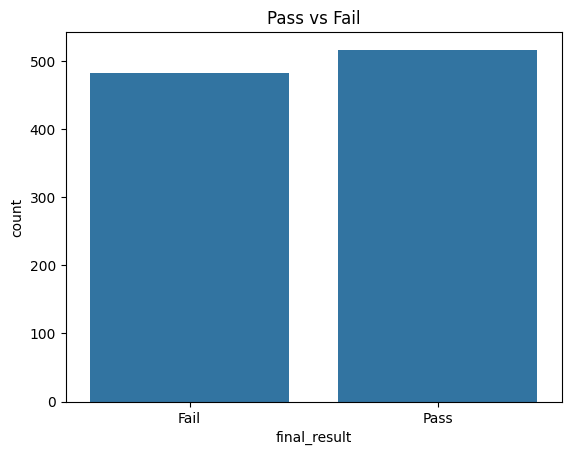

In [13]:
sns.countplot(x='final_result', data=df)
plt.title("Pass vs Fail")
plt.show()


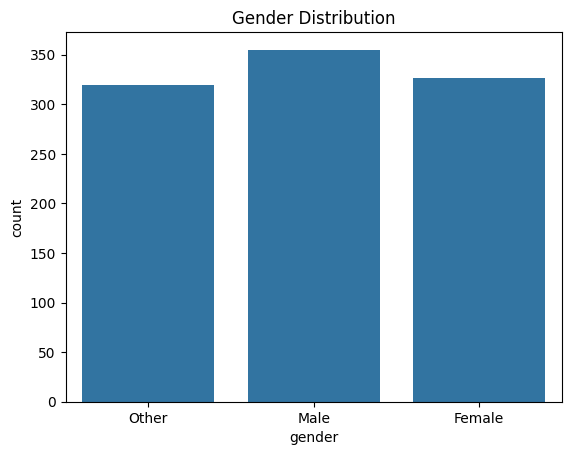

In [14]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


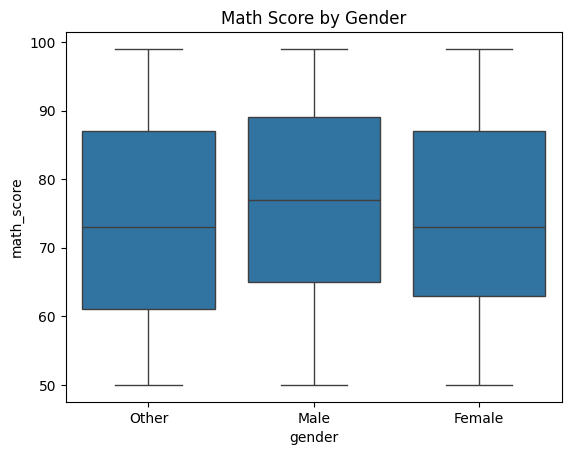

In [15]:
sns.boxplot(x='gender', y='math_score', data=df)
plt.title("Math Score by Gender")
plt.show()


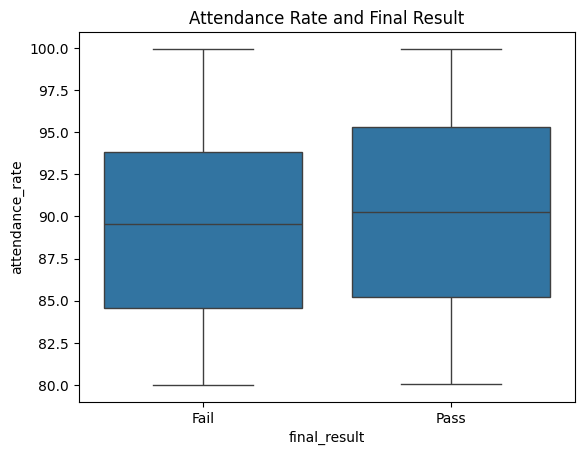

In [16]:
sns.boxplot(x='final_result', y='attendance_rate', data=df)
plt.title("Attendance Rate and Final Result")
plt.show()


In [17]:
numeric_df = df.select_dtypes(include='number')

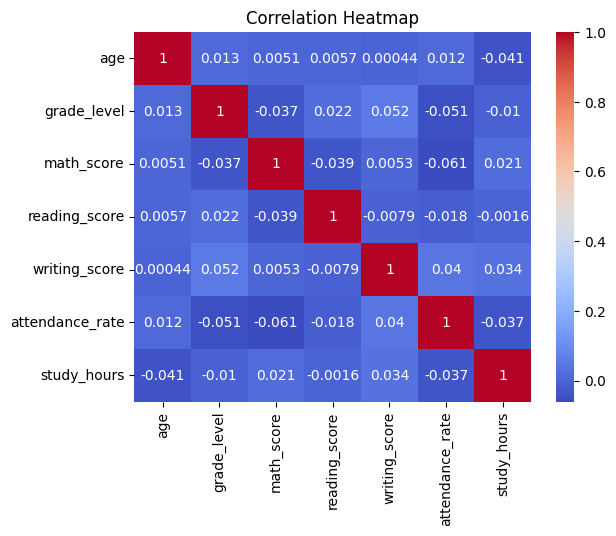

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
print("All columns:", df.columns.tolist())
print("Numeric columns:", numeric_df.columns.tolist())


All columns: ['student_id', 'name', 'gender', 'age', 'grade_level', 'math_score', 'reading_score', 'writing_score', 'attendance_rate', 'parent_education', 'study_hours', 'internet_access', 'lunch_type', 'extra_activities', 'final_result']
Numeric columns: ['age', 'grade_level', 'math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']


C:\Users\Admin\AppData\Local\Temp\ipykernel_8728\167715511.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='grade_level', y='average_score', data=df, ci=None)


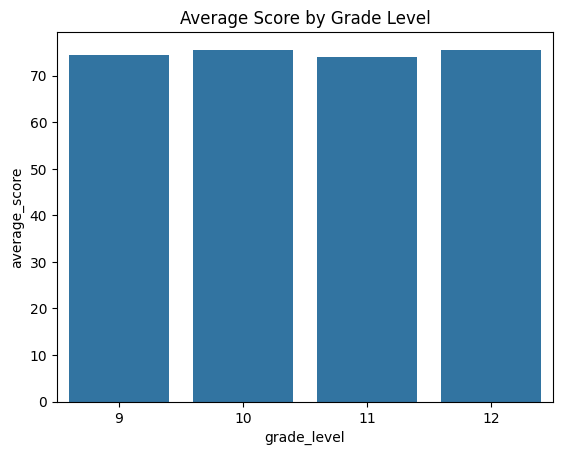

In [20]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

sns.barplot(x='grade_level', y='average_score', data=df, ci=None)
plt.title("Average Score by Grade Level")
plt.show()


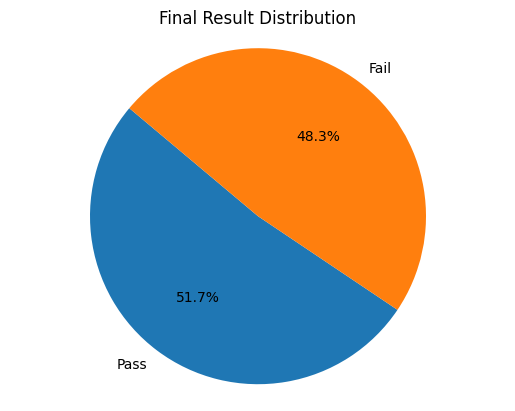

In [21]:
final_counts = df['final_result'].value_counts()
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Final Result Distribution")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie.
plt.show()

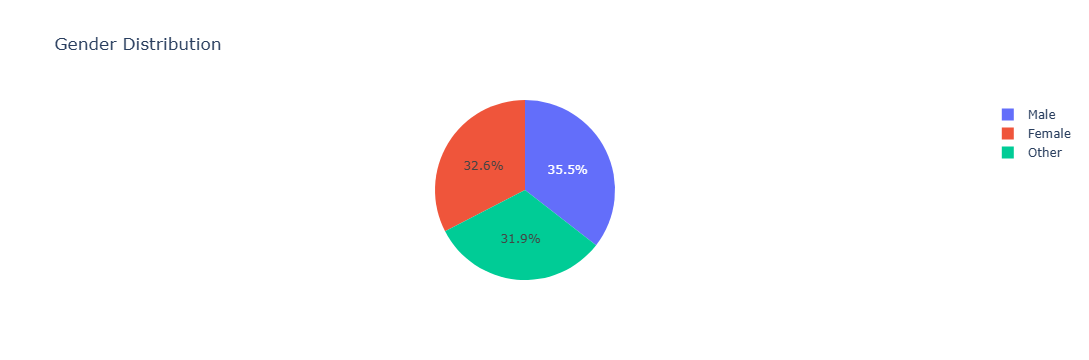

In [22]:
import plotly.express as px

fig = px.pie(df, names='gender', title='Gender Distribution')
fig.show()



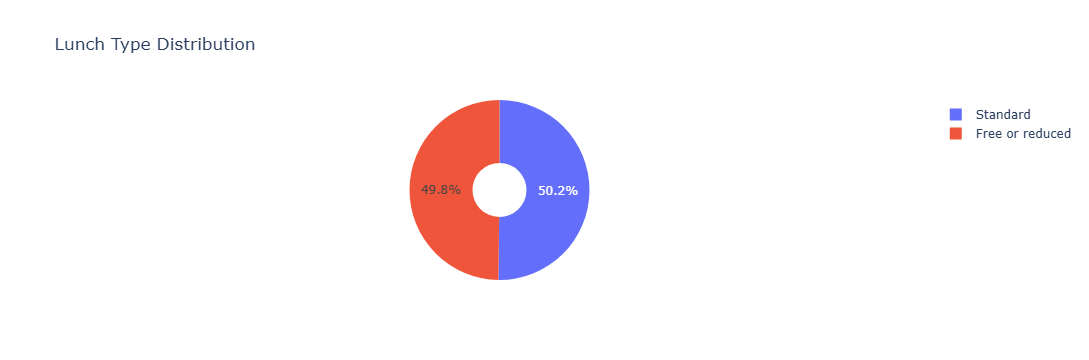

In [23]:
fig = px.pie(df, names='lunch_type', title='Lunch Type Distribution', hole=0.3)
fig.show()


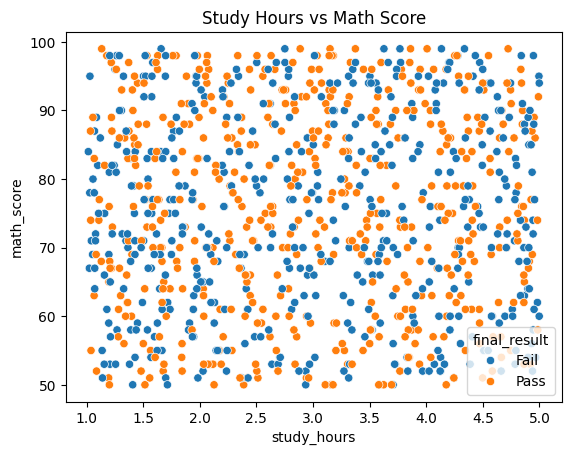

In [24]:
import seaborn as sns

sns.scatterplot(x='study_hours', y='math_score', hue='final_result', data=df)
plt.title("Study Hours vs Math Score")
plt.show()


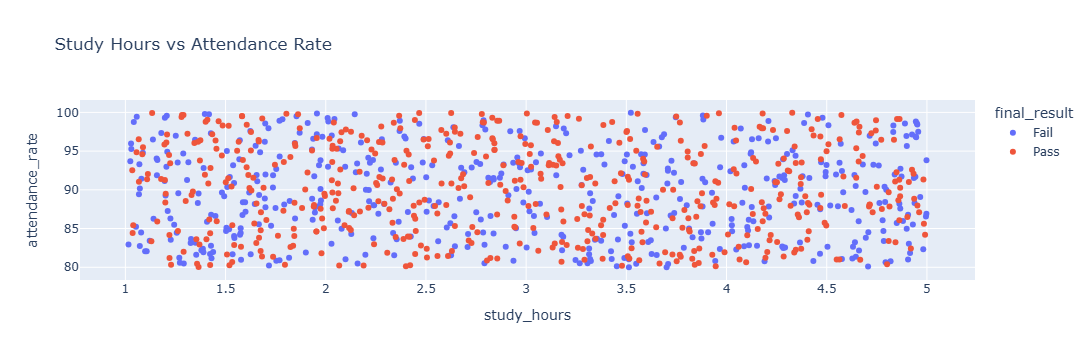

In [25]:
fig = px.scatter(df, x='study_hours', y='attendance_rate', color='final_result',
                 title='Study Hours vs Attendance Rate',
                 hover_data=['math_score', 'reading_score'])
fig.show()


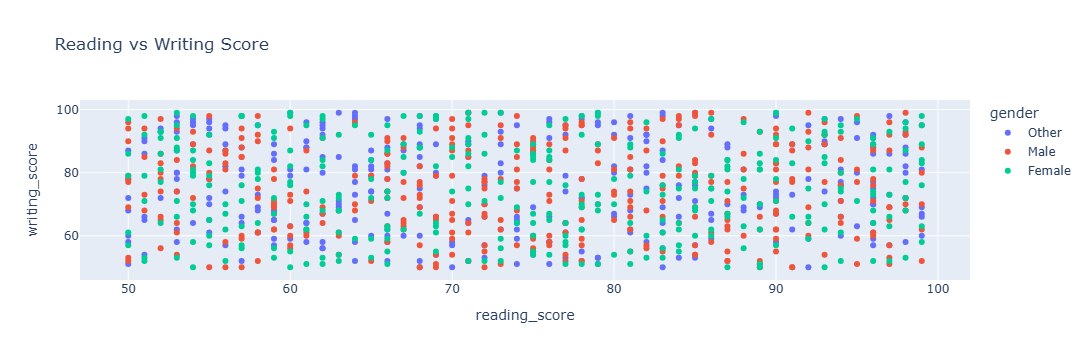

In [26]:
fig = px.scatter(df, x='reading_score', y='writing_score', color='gender',
                 title='Reading vs Writing Score',
                 hover_data=['name', 'final_result'])
fig.show()


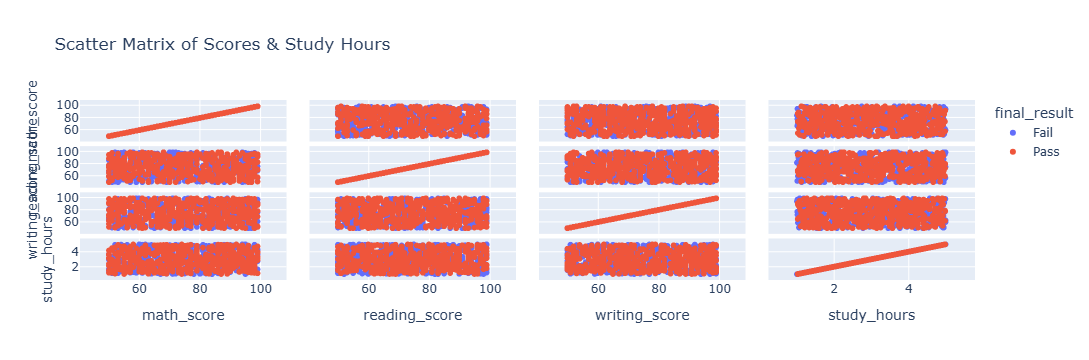

In [27]:
fig = px.scatter_matrix(df,
                        dimensions=['math_score', 'reading_score', 'writing_score', 'study_hours'],
                        color='final_result',
                        title="Scatter Matrix of Scores & Study Hours")
fig.show()


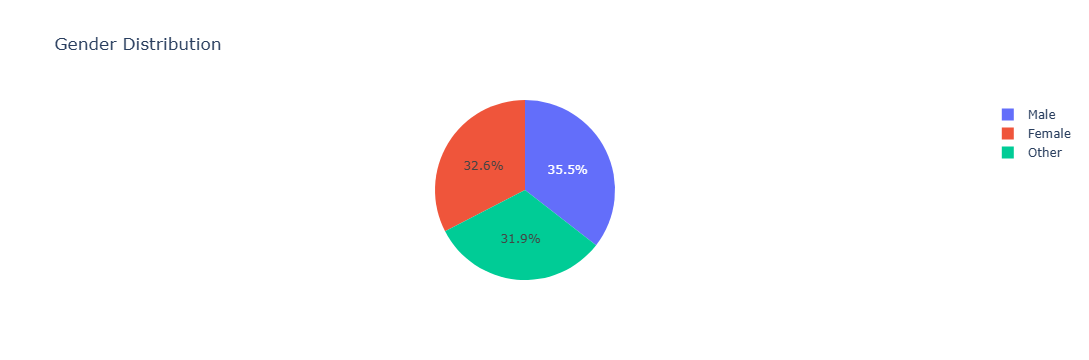

In [28]:
fig = px.pie(df, names='gender', title='Gender Distribution')
fig.show()